In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
gr_q = pd.read_csv('./data/gregory_quality.csv')
br_q = pd.read_csv('./data/burnett_quality.csv')
gr_e = pd.read_csv('./data/gregory_environmental.csv')
gr_q_copy = gr_q.copy()
br_q_copy = br_q.copy()
gr_e_copy = gr_e.copy()

C:\Users\YJ\AppData\Local\Temp\ipykernel_3380\1552975768.py:1: DtypeWarning: Columns (2,4,6,8,10,14,16,18,20,23,26,28,30,32,34,44,47) have mixed types. Specify dtype option on import or set low_memory=False.
  gr_q = pd.read_csv('./data/gregory_quality.csv')


In [85]:
gr_q = gr_q.drop(['Unnamed: 60','Unnamed: 61','Unnamed: 62','Unnamed: 63','Unnamed: 64','Unnamed: 65',
                  'Unnamed: 66','Unnamed: 67','Unnamed: 68','Unnamed: 69'],axis = 1)

In [86]:
gr_q = gr_q.drop(['Unnamed: 50','Unnamed: 51','Unnamed: 52','Unnamed: 53','Unnamed: 54','Unnamed: 55',
                  'Unnamed: 56','Unnamed: 57','Unnamed: 58','Unnamed: 59'],axis = 1)

In [87]:
gr_q = gr_q.drop(['Unnamed: 48','Unnamed: 49'],axis = 1)

In [88]:
gr_q = gr_q.drop(['OPUS1036 Abs210','OPUS1036 Abs210 [Quality]','OPUS1038 FitError','OPUS1038 FitError [Quality]',
                  'OPUS1042 Abs254','OPUS1042 Abs254 [Quality]','OPUS1052 COD SACeq','OPUS1052 COD SACeq [Quality]',
                  'OPUS1060 SQI','OPUS1060 SQI [Quality]'],axis = 1)

In [89]:
gr_q = gr_q.drop(['OPUS1004 CODeq','OPUS1004 CODeq [Quality]','OPUS1014 TOCeq','OPUS1014 TOCeq [Quality]','OPUS1016 TSSeq','OPUS1016 TSSeq [Quality]',
                  'OPUS1032 SAC254','OPUS1032 SAC254 [Quality]','OPUS1034 Abs360','OPUS1034 Abs360 [Quality]'],axis = 1)

In [90]:
gr_q = gr_q.drop(['OPUS1 MeasureTime','OPUS1 MeasureTime [Quality]','OPUS1000 N NO3','OPUS1000 N NO3 [Quality]'],axis = 1)

In [91]:
gr_q = gr_q.drop(['EXO ChlugL [Quality]','EXO Depthm [Quality]','EXO DOmgL [Quality]','EXO fDOMRFU [Quality]','EXO Salpsu [Quality]',
                  'EXO SpCondmScm [Quality]','EXO TSSmgL [Quality]'],axis = 1)

In [92]:
print(gr_q['EXO DOPerSat [Quality]'].value_counts())
print(gr_q['EXO pH [Quality]'].value_counts())
print(gr_q['EXO TempC [Quality]'].value_counts())
print(gr_q['EXO TurbNTU [Quality]'].value_counts())

EXO DOPerSat [Quality]
2010.0    689
Name: count, dtype: int64
EXO pH [Quality]
2010.0    2
Name: count, dtype: int64
EXO TempC [Quality]
155.0    25
Name: count, dtype: int64
EXO TurbNTU [Quality]
2010      498
NTU         1
2010.0      1
Name: count, dtype: int64


In [93]:
gr_q = gr_q.drop(['EXO TempC [Quality]','EXO pH [Quality]','EXO DOPerSat [Quality]','EXO TurbNTU [Quality]'],axis = 1)

In [94]:
gr_q = gr_q.drop(['EXO fDOMRFU','EXO TSSmgL'],axis = 1)

In [95]:
gr_q = gr_q.drop(['Record'],axis = 1)

In [96]:
gr_q.dropna(axis=0,inplace=True)

In [97]:
type_ls = ['EXO ChlugL','EXO Depthm','EXO DOmgL','EXO DOPerSat','EXO Salpsu','EXO SpCondmScm', 'EXO TempC']  
for feat in type_ls:
    gr_q[feat] = gr_q[feat].astype(float)

In [98]:
gr_q.describe()

,EXO ChlugL,EXO Depthm,EXO DOmgL,EXO DOPerSat,EXO pH,EXO Salpsu,EXO SpCondmScm,EXO TempC,EXO TurbNTU
count,10559.000000,10559.000000,10559.000000,10559.000000,10559.000000,10559.000000,10559.000000,10559.000000,10559.000000
mean,4.245922,0.258214,4.559335,64.527206,7.585735,17.327192,27.586457,28.879017,17.625503
std,1.542851,0.061794,1.045555,11.983623,0.311754,10.568201,16.269828,2.050702,26.811539
min,0.430000,0.120000,2.020000,30.550000,6.910000,0.050000,0.116000,24.956000,1.250000
25%,3.380000,0.216000,3.770000,55.420000,7.410000,7.945000,13.811500,27.219500,3.860000
50%,4.020000,0.256000,4.310000,62.760000,7.590000,20.350000,32.745000,29.147000,6.950000
75%,4.870000,0.296000,5.220000,75.010000,7.740000,25.470000,40.105000,30.619000,23.175000
max,27.470000,0.401000,6.950000,102.340000,8.400000,34.370000,52.454000,33.060000,1084.810000


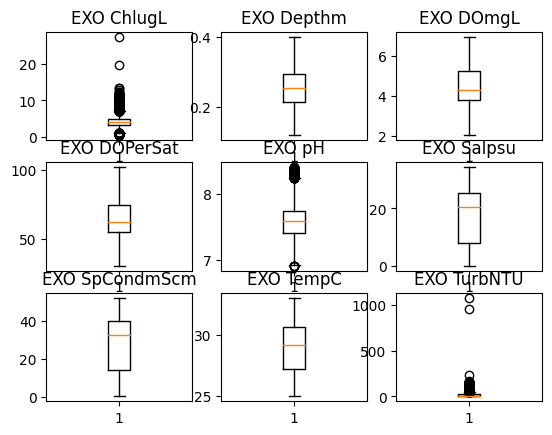

In [99]:
nrow = 3
ncol = 3
for n in range(1,10):
    plt.subplot(nrow,ncol,n)
    plt.boxplot(gr_q.iloc[:,n])
    plt.title(gr_q.columns[n])
plt.show()

In [100]:
gr_q.loc[gr_q['EXO TurbNTU'] > 500,]

,Timestamp,EXO ChlugL,EXO Depthm,EXO DOmgL,EXO DOPerSat,EXO pH,EXO Salpsu,EXO SpCondmScm,EXO TempC,EXO TurbNTU
1297,2025/1/2 22:30,3.69,0.347,4.21,61.96,7.54,21.66,34.629,29.216,1084.81
9203,2025/3/6 16:20,2.15,0.128,3.96,59.97,7.66,21.66,34.688,30.909,956.06


In [101]:
gr_q = gr_q.drop([1297,9203],axis = 0)

In [102]:
gr_q.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10557 entries, 1 to 10915
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       10557 non-null  object 
 1   EXO ChlugL      10557 non-null  float64
 2   EXO Depthm      10557 non-null  float64
 3   EXO DOmgL       10557 non-null  float64
 4   EXO DOPerSat    10557 non-null  float64
 5   EXO pH          10557 non-null  float64
 6   EXO Salpsu      10557 non-null  float64
 7   EXO SpCondmScm  10557 non-null  float64
 8   EXO TempC       10557 non-null  float64
 9   EXO TurbNTU     10557 non-null  float64
dtypes: float64(9), object(1)
memory usage: 907.2+ KB


In [103]:
gr_q

,Timestamp,EXO ChlugL,EXO Depthm,EXO DOmgL,EXO DOPerSat,EXO pH,EXO Salpsu,EXO SpCondmScm,EXO TempC,EXO TurbNTU
1,2024/12/25 0:00,3.89,0.322,3.02,41.65,7.31,9.15,15.765,29.451,8.16
2,2024/12/25 0:10,3.98,0.320,3.03,41.75,7.29,8.89,15.350,29.472,8.90
3,2024/12/25 0:20,4.01,0.318,3.05,41.90,7.28,8.46,14.670,29.492,9.03
4,2024/12/25 0:30,4.04,0.317,3.09,42.34,7.27,7.93,13.820,29.511,9.34
5,2024/12/25 0:40,4.06,0.316,3.14,42.87,7.25,7.31,12.806,29.541,9.91
...,...,...,...,...,...,...,...,...,...,...
10911,2025/3/18 11:10,3.21,0.267,3.66,49.75,7.76,14.00,23.232,27.010,5.85
10912,2025/3/18 11:20,3.45,0.274,3.66,49.65,7.76,13.98,23.194,27.015,5.80
10913,2025/3/18 11:30,3.06,0.271,3.77,51.48,7.81,14.87,24.540,27.007,5.35
10914,2025/3/18 11:40,3.13,0.272,3.71,50.57,7.80,14.57,24.089,27.034,6.49


In [104]:
gr_q.to_csv('./data/gr_q.csv')

In [105]:
br_q = br_q.drop(['fDOMQSU','fDOMRFU','Record'],axis = 1)

In [106]:
br_q.dropna(axis=0,inplace=True)

In [107]:
br_q.describe()

,Chlugl,Depthm,DOmgL,DOPerSat,pH,Salinitypsu,SpCondmS,TemperatureDegC,TurbNTU
count,17168.000000,17168.000000,17168.000000,17168.000000,17168.000000,17168.000000,17168.000000,17168.000000,17168.000000
mean,4.126969,0.050190,6.758318,89.118078,7.765043,13.409487,21.447946,25.709176,15.725010
std,2.891567,0.055346,0.867814,10.129323,0.225241,10.750802,16.692930,4.004110,26.087269
min,0.130000,-0.187000,3.190000,45.880000,6.060000,0.000000,0.000000,10.892000,-1.180000
25%,2.010000,0.016000,6.200000,82.360000,7.660000,0.600000,1.219750,22.970000,3.380000
50%,3.590000,0.054000,6.690000,87.840000,7.810000,13.720000,22.773500,26.763000,5.440000
75%,5.200000,0.091000,7.280000,96.000000,7.910000,24.170000,38.114500,28.521000,11.870000
max,32.060000,0.196000,10.750000,141.430000,8.370000,30.810000,47.266000,37.935000,347.140000


In [108]:
br_q.loc[br_q['TurbNTU'] < 0]

,Timestamp,Chlugl,Depthm,DOmgL,DOPerSat,pH,Salinitypsu,SpCondmS,TemperatureDegC,TurbNTU
3828,2024/3/20 13:35,1.71,0.026,7.75,115.28,8.02,24.58,38.797,28.948,-0.08
3831,2024/3/20 15:05,3.19,0.017,8.09,120.56,8.05,25.02,39.418,28.857,-0.52
3832,2024/3/20 15:35,2.76,0.017,8.24,122.59,8.07,25.55,40.155,28.616,-0.82
3833,2024/3/20 16:05,2.88,0.020,8.30,123.83,8.10,25.67,40.337,28.742,-0.73
3834,2024/3/20 16:35,5.81,0.024,8.42,125.54,8.10,25.84,40.573,28.638,-0.63
3835,2024/3/20 17:05,5.08,0.024,8.34,124.51,8.09,26.25,41.141,28.596,-0.84
3836,2024/3/20 17:35,4.01,0.027,7.96,118.91,8.05,26.57,41.589,28.528,-1.05
3837,2024/3/20 18:05,5.15,0.031,7.80,116.64,8.04,26.82,41.948,28.474,-1.14
3838,2024/3/20 18:35,3.75,0.032,7.78,115.99,8.04,26.62,41.659,28.377,-0.93
3839,2024/3/20 19:05,4.03,0.035,7.44,111.00,8.01,26.93,42.087,28.311,-0.77


In [109]:
br_q.drop(br_q[(br_q.TurbNTU < 0)].index, inplace = True)

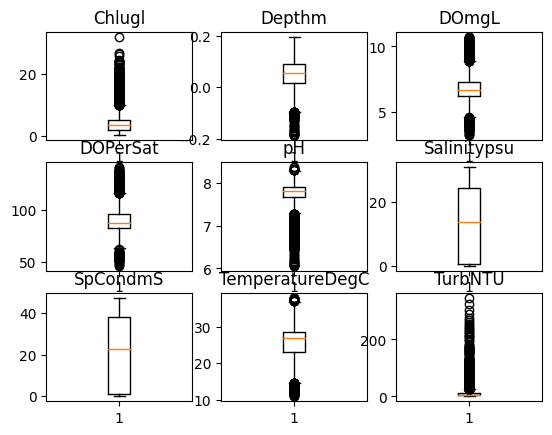

In [110]:
nrow = 3
ncol = 3
for n in range(1,10):
    plt.subplot(nrow,ncol,n)
    plt.boxplot(br_q.iloc[:,n])
    plt.title(br_q.columns[n])
plt.show()

In [111]:
br_q.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17136 entries, 1044 to 19029
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        17136 non-null  object 
 1   Chlugl           17136 non-null  float64
 2   Depthm           17136 non-null  float64
 3   DOmgL            17136 non-null  float64
 4   DOPerSat         17136 non-null  float64
 5   pH               17136 non-null  float64
 6   Salinitypsu      17136 non-null  float64
 7   SpCondmS         17136 non-null  float64
 8   TemperatureDegC  17136 non-null  float64
 9   TurbNTU          17136 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [112]:
br_q

,Timestamp,Chlugl,Depthm,DOmgL,DOPerSat,pH,Salinitypsu,SpCondmS,TemperatureDegC,TurbNTU
1044,2024/1/22 16:25,12.86,-0.014,7.57,111.12,8.03,10.53,18.016,32.808,5.47
1045,2024/1/22 16:35,15.44,-0.015,7.79,114.12,8.06,10.40,17.810,32.723,5.50
1046,2024/1/22 17:05,16.08,-0.014,7.50,110.20,8.02,11.68,19.795,32.464,4.17
1047,2024/1/22 17:35,14.37,-0.013,7.61,111.96,8.03,11.75,19.918,32.523,4.38
1048,2024/1/22 18:05,14.22,-0.013,7.14,105.01,7.96,12.18,20.581,32.308,4.71
...,...,...,...,...,...,...,...,...,...,...
19025,2025/5/14 7:34,3.78,0.104,6.51,84.88,7.76,21.02,33.516,22.449,4.61
19026,2025/5/14 8:04,2.58,0.106,6.46,84.59,7.78,21.77,34.596,22.479,4.19
19027,2025/5/14 8:34,2.28,0.108,6.46,85.06,7.80,22.48,35.615,22.568,4.21
19028,2025/5/14 9:04,2.52,0.108,6.51,85.61,7.79,21.92,34.817,22.674,4.12


In [113]:
br_q.to_csv('./data/br_q.csv')

In [114]:
gr_e = gr_e.drop(['AbsTilt Avg','AbsTilt Avg [Quality]','Direction Avg','Direction Avg [Quality]',
                 'EastCur Avg','EastCur Avg [Quality]'],axis = 1)

In [115]:
gr_e = gr_e.drop(['Gill Latitude','Gill Latitude [Quality]','Gill Longitude','Gill Longitude [Quality]'],axis = 1)

In [116]:
gr_e = gr_e.drop(['Gill DewPoint Avg','Gill DewPoint Avg [Quality]','ABSSpd Avg','ABSSpd Avg [Quality]',
                  'SigStrength Avg','SigStrength Avg [Quality]','SPstd Avg','SPstd Avg [Quality]','StdTilt Avg','StdTilt Avg [Quality]',
                  'TiltX Avg','TiltX Avg [Quality]','TiltY Avg','TiltY Avg [Quality]'],axis = 1)

In [117]:
gr_e = gr_e.drop(['Heading Avg','Heading Avg [Quality]','MaxTilt Avg','MaxTilt Avg [Quality]','NorthCur Avg','NorthCur Avg [Quality]',
                  'PingCnt Avg','PingCnt Avg [Quality]'],axis = 1)

In [118]:
gr_e = gr_e.drop(['Gill Wd MeanUnitVector','Gill Wd MeanUnitVector [Quality]','Gill Wd StdDev','Gill Wd StdDev [Quality]',
                  'Gill WindSpd Max','Gill WindSpd Max [Quality]'],axis = 1)

In [119]:
gr_e = gr_e.drop(['Gill Pressure [Quality]','Record','Gill Rain mm Tot [Quality]','Gill TotalDailyRain mm [Quality]',
                  'Gill TotalRain mm [Quality]','Gill Ws Mean [Quality]'],axis = 1)

In [120]:
gr_e = gr_e.drop(['Gill Pressure'],axis = 1)

In [121]:
gr_e = gr_e.drop(0,axis = 0)

In [122]:
type_ls = ['Gill Rain mm Tot','Gill TotalRain mm','Gill Ws Mean']
for feat in type_ls:
    gr_e[feat] = gr_e[feat].astype(float)

In [123]:
gr_e.dropna(axis=0,inplace=True)

In [124]:
gr_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10770 entries, 1 to 10770
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               10770 non-null  object 
 1   Gill Rain mm Tot        10770 non-null  float64
 2   Gill TotalDailyRain mm  10770 non-null  float64
 3   Gill TotalRain mm       10770 non-null  float64
 4   Gill Ws Mean            10770 non-null  float64
dtypes: float64(4), object(1)
memory usage: 420.8+ KB


In [125]:
gr_e.describe()

,Gill Rain mm Tot,Gill TotalDailyRain mm,Gill TotalRain mm,Gill Ws Mean
count,10770.000000,10770.000000,10770.000000,10770.000000
mean,1.715799,114.654504,0.649218,1.998387
std,5.162781,234.848227,1.312365,1.115920
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.130000
50%,0.000000,0.000000,0.000000,1.794000
75%,0.000000,115.200000,0.640000,2.668000
max,80.200000,1926.449000,10.320000,6.647000


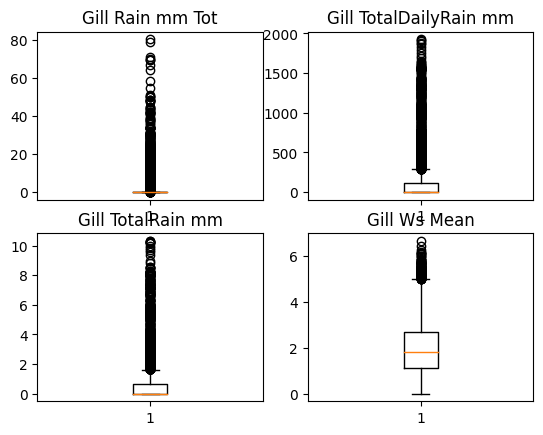

In [126]:
nrow = 2
ncol = 2
for n in range(1,5):
    plt.subplot(nrow,ncol,n)
    plt.boxplot(gr_e.iloc[:,n])
    plt.title(gr_e.columns[n])
plt.show()

In [127]:
gr_e

,Timestamp,Gill Rain mm Tot,Gill TotalDailyRain mm,Gill TotalRain mm,Gill Ws Mean
1,2024/12/26 0:00,0.0,100.80,0.56,0.739
2,2024/12/26 0:10,0.0,0.00,0.56,0.883
3,2024/12/26 0:20,0.0,0.00,0.00,0.710
4,2024/12/26 0:30,0.0,0.00,0.00,0.547
5,2024/12/26 0:40,0.0,0.00,0.00,0.653
...,...,...,...,...,...
10766,2025/3/18 11:10,0.0,79.92,0.40,2.811
10767,2025/3/18 11:20,0.0,79.92,0.40,2.902
10768,2025/3/18 11:30,0.0,79.92,0.40,2.035
10769,2025/3/18 11:40,0.0,79.92,0.40,2.228


In [128]:
gr_e.to_csv('./data/gr_e.csv')